In [1]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from yellowbrick.model_selection import ValidationCurve
from sklearn.linear_model import Ridge
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import QuantileTransformer

In [2]:
Data=pd.read_csv('1000_2out.csv')
X=Data[Data.columns[1:23]]
y=Data[Data.columns[24]]
cv = KFold(n_splits=10, random_state=1)

C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [3]:
Data.columns[24]

'Pelvis_Acc_Rmax(g)'

C:\Users\ypyas\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

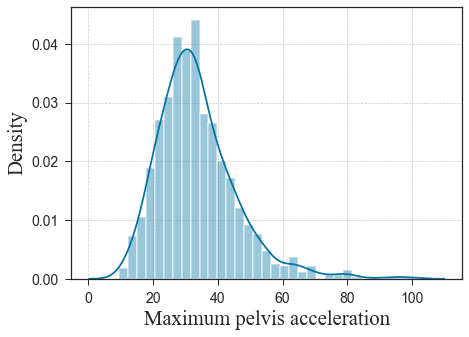

In [4]:
plt.figure(figsize=(7, 5))
plt.style.use('seaborn-ticks')
csfont = {'fontname':'Times New Roman'}
sns.distplot(y,hist=True,color='b',hist_kws=dict(edgecolor="white", linewidth=2))
plt.xlabel('Maximum pelvis acceleration', fontsize='xx-large',**csfont)
plt.ylabel('Density', fontsize='xx-large',**csfont)
plt.grid(linestyle = '--', linewidth = 0.7)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
# plt.savefig('pelinit')

In [6]:
dd=QuantileTransformer(output_distribution='normal')
yv=y.to_numpy()
yv=yv.reshape(-1, 1)
yt=dd.fit_transform(yv)

C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (995). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


C:\Users\ypyas\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(array([-8., -6., -4., -2.,  0.,  2.,  4.,  6.,  8.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

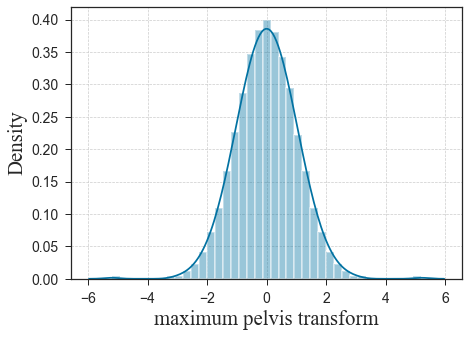

In [7]:
plt.figure(figsize=(7, 5))
plt.style.use('seaborn-ticks')
csfont = {'fontname':'Times New Roman'}
sns.distplot(yt,hist=True,color='b',hist_kws=dict(edgecolor="white", linewidth=2))
plt.xlabel('maximum pelvis transform', fontsize='xx-large',**csfont)
plt.ylabel('Density', fontsize='xx-large',**csfont)
plt.grid(linestyle = '--', linewidth = 0.7)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
# plt.savefig('peltrans')

In [7]:
alpha = np.linspace(1e-07, 0.1, 200, endpoint=True)
solver=['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
# normalize=[True,False]


random_grid = {"alpha" :alpha,
#                "normalize":normalize,
               "solver":solver}

In [8]:
dd=QuantileTransformer()
yv=y.to_numpy()
yv=yv.reshape(-1, 1)
yt=dd.fit_transform(yv)
rf = Ridge()
reg = GridSearchCV(rf,param_grid = random_grid ,cv = cv, return_train_score=True,scoring="neg_root_mean_squared_error", verbose=2, n_jobs = -1)
reg.fit(X,y)
    

C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (995). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 10 folds for each of 1400 candidates, totalling 14000 fits


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 240 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 1052 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 2184 tasks      | elapsed:   19.7s
[Parallel(n_jobs=-1)]: Done 3644 tasks      | elapsed:   29.8s
[Parallel(n_jobs=-1)]: Done 5424 tasks      | elapsed:   42.6s
[Parallel(n_jobs=-1)]: Done 7532 tasks      | elapsed:   58.0s
[Parallel(n_jobs=-1)]: Done 9960 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 12716 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 13977 out of 14000 | elapsed:  1.8min remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 14000 out of 14000 | elapsed:  1.8min finished


GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=False),
             estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-07, 5.02612060e-04, 1.00512412e-03, 1.50763618e-03,
       2.01014824e-03, 2.51266030e-03, 3.01517236e-03, 3.51768442e-03,
       4.02019648e-03, 4.52270854e-03, 5.02522060e-03, 5.52773266e-03,
       6.03024472e-03, 6.53275678e-03, 7.03526884e-03, 7.5377...
       9.24623191e-02, 9.29648312e-02, 9.34673432e-02, 9.39698553e-02,
       9.44723673e-02, 9.49748794e-02, 9.54773915e-02, 9.59799035e-02,
       9.64824156e-02, 9.69849276e-02, 9.74874397e-02, 9.79899518e-02,
       9.84924638e-02, 9.89949759e-02, 9.94974879e-02, 1.00000000e-01]),
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga']},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=2)

In [9]:
reg.best_estimator_

Ridge(alpha=0.1)

In [3]:
modo=Ridge(alpha=0.1)
mod= TransformedTargetRegressor(regressor=modo,transformer=QuantileTransformer(output_distribution='normal'))

In [4]:
cv = KFold(n_splits=10, random_state=1)

In [5]:
y_actual = []
predict = []
# X, X_Test, y, y_Test = train_test_split(X, y, test_size=0.2, random_state=23)
train_size,train_score,test_score=learning_curve(mod,X,y,cv=cv,scoring='neg_mean_absolute_error',train_sizes=[50,150,250,500,750,895])
kf=cv

C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (50). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (150). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (250). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (500). n_quantiles is set to n_samples.
  warnings

## Learning Curve

<Figure size 576x396 with 0 Axes>

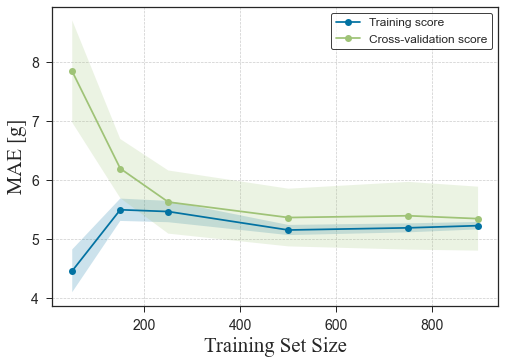

In [6]:
# train_mean=-np.mean(train_score,axis=1)
# train_std=-np.std(train_score,axis=1)
# test_mean=-np.mean(test_score,axis=1)
# test_std=-np.std(test_score,axis=1)
    
# plt.figure()
# plt.subplots(1)
# plt.plot(train_size,train_mean, 'o-', color="b",label="Training score")
# plt.plot(train_size, test_mean, 'o-', color="g",label="Cross-validation score")
# plt.fill_between(train_size, train_mean - train_std, train_mean + train_std, alpha=0.2)
# plt.fill_between(train_size, test_mean - test_std, test_mean + test_std, alpha=0.2)
# plt.title("Learning Curve for {}".format(str(mod).split('(')[0]))
# plt.xlabel("Training Set Size")
# plt.ylabel("RMS Error")
# plt.legend(loc="best")
# plt.show()
train_mean=-np.mean(train_score,axis=1)
train_std=-np.std(train_score,axis=1)
test_mean=-np.mean(test_score,axis=1)
test_std=-np.std(test_score,axis=1)
    
plt.figure()
plt.style.use('seaborn-ticks')
csfont = {'fontname':'Times New Roman'}
plt.subplots(1)
plt.plot(train_size,train_mean, 'o-', color="b",label="Training score")
plt.plot(train_size, test_mean, 'o-', color="g",label="Cross-validation score")
plt.fill_between(train_size, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.fill_between(train_size, test_mean - test_std, test_mean + test_std, alpha=0.2)
# plt.title("Learning Curve for {}".format(str(mod).split('(')[0]))
plt.xlabel("Training Set Size", fontsize='xx-large',**csfont)
plt.ylabel("MAE [g]", fontsize='xx-large',**csfont)
leg = plt.legend(frameon=True,loc='best',prop={'size': 12})
leg.get_frame().set_linewidth(1)
leg.get_frame().set_edgecolor('k')
plt.grid(linestyle = '--', linewidth = 0.7)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
# plt.savefig('pelRidLC', bbox_inches="tight")
plt.show()

In [7]:
pd.DataFrame(test_mean)

,0
0,7.841488
1,6.195787
2,5.627415
3,5.364778
4,5.395038
5,5.345804


## Unknown data test

In [8]:
X = X.to_numpy()
y = y.to_numpy()
y_Test=y_Test.to_numpy()
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    HBM_Train = mod.fit(X_train, y_train)
    HBM_Test = HBM_Train.predict(X_test)
    print('Root Mean squared error: %f'
          % mean_squared_error(y_test, HBM_Test,squared=False))
    print()

ytestunk=HBM_Train.predict(X_Test)
err=np.zeros(len(ytestunk))
for u in range (0,len(ytestunk)):
    err[u]=np.sqrt((y_Test[u]-ytestunk[u])**2)
a=pd.DataFrame(err).describe()
cov_r=a.loc['std']/abs(a.loc['mean'])
print("error COV--->{}  error mean --->{}  error std --->{}".format(cov_r,abs(a.loc['mean']),a.loc['std']))

Root Mean squared error: 7.287793

Root Mean squared error: 6.500530

Root Mean squared error: 7.804518

Root Mean squared error: 10.571349

Root Mean squared error: 8.592270

Root Mean squared error: 7.831658

Root Mean squared error: 6.183923

Root Mean squared error: 6.376134

Root Mean squared error: 6.123803

Root Mean squared error: 10.685357

error COV--->0    0.982623
dtype: float64  error mean --->0    5.063286
Name: mean, dtype: float64  error std --->0    4.975301
Name: std, dtype: float64


C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (716). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (716). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (716). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (716). n_quantiles is set to n_samples.
  warning

# train score

In [9]:
ytr=HBM_Train.predict(X)
err=np.zeros(len(ytr))
for u in range (0,len(ytr)):
    err[u]=np.sqrt((y[u]-ytr[u])**2)
a=pd.DataFrame(err).describe()
cov_r=a.loc['std']/abs(a.loc['mean'])
print("error COV--->{}  error mean --->{}  error std --->{}".format(cov_r,abs(a.loc['mean']),a.loc['std']))

error COV--->0    1.073312
dtype: float64  error mean --->0    5.277653
Name: mean, dtype: float64  error std --->0    5.664568
Name: std, dtype: float64


In [10]:
err=np.zeros(len(ytr))
for u in range (0,len(ytr)):
    err[u]=y[u]-ytr[u]
pd.DataFrame(err).describe()

,0
count,796.000000
mean,0.487467
std,7.729040
min,-31.678716
25%,-4.076529
50%,-0.385465
75%,4.008647
max,72.607449


In [11]:
err=np.zeros(len(ytestunk))
for u in range (0,len(ytestunk)):
    err[u]=y_Test[u]-ytestunk[u]
pd.DataFrame(err).describe()

,0
count,199.000000
mean,0.362512
std,7.098442
min,-28.781832
25%,-3.766632
50%,-0.538748
75%,4.230085
max,42.345755


In [16]:
df_tosave=pd.DataFrame(ytestunk,columns = ['Unseen predicted'])
df_tosave['test actual']=pd.DataFrame(y_Test)
df_tosave.to_csv('riunseen.csv')

df_trn=pd.DataFrame(ytr,columns = ['train predicted'])
df_trn['actual']=pd.DataFrame(y)
df_trn.to_csv('ritrain.csv')

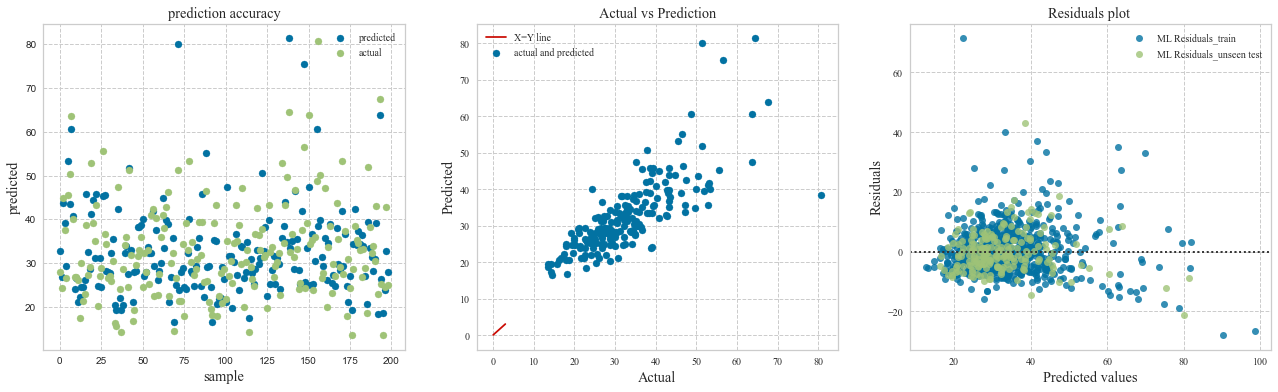

In [17]:
plt.figure(figsize=(22, 6))
csfont = {'fontname':'Times New Roman'}
plt.subplot(1,3,1)
plt.scatter(np.arange(0,len(ytestunk)),ytestunk,label='predicted')
plt.scatter(np.arange(0,len(y_Test)),y_Test,label='actual')
plt.grid( linestyle='--')
plt.title('prediction accuracy', fontsize='large',**csfont)
plt.xlabel('sample', fontsize='large',**csfont)
plt.ylabel('predicted', fontsize='large',**csfont)
plt.rcParams["font.family"] = "Times New Roman"
plt.legend()

plt.subplot(1,3,2)
plt.scatter(y_Test,ytestunk,label='actual and predicted')
plt.plot([0,3],[0,3],color='r',label='X=Y line')
plt.grid( linestyle='--')
plt.title('Actual vs Prediction', fontsize='large',**csfont)
plt.xlabel('Actual', fontsize='large',**csfont)
plt.ylabel('Predicted', fontsize='large',**csfont)
plt.rcParams["font.family"] = "Times New Roman"
plt.legend()

plt.subplot(1,3,3)
a=sns.residplot(y=abs(y), x=abs(ytr),label='ML Residuals_train')
r=sns.residplot(y=abs(y_Test), x=abs(ytestunk),label='ML Residuals_unseen test')
plt.grid( linestyle='--')
plt.title('Residuals plot ', fontsize='large',**csfont)
plt.xlabel('Predicted values', fontsize='large',**csfont)
plt.ylabel('Residuals', fontsize='large',**csfont)
plt.rcParams["font.family"] = "Times New Roman"
plt.legend()

plt.show()

# Lasso

In [8]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from yellowbrick.model_selection import ValidationCurve
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import AlphaSelection
from yellowbrick.regressor import ManualAlphaSelection

In [2]:
alpha = np.linspace(1e-06, 0.1, 100, endpoint=True)
selection=['cyclic','random']
# normalize=[True,False]
# warm_start=[True,False]

random_grid = {"alpha" :alpha,
#                "normalize":normalize,
#                "warm_start":warm_start,
               "selection":selection}

In [9]:
Data=pd.read_csv('1000_2out.csv')
X=Data[Data.columns[1:23]]
y=Data[Data.columns[24]]

In [22]:
# Use the random grid to search for best hyperparameters
dd=QuantileTransformer()
yv=y.to_numpy()
yv=yv.reshape(-1, 1)
yt=dd.fit_transform(yv)
rf = Lasso()
reg = GridSearchCV(rf,param_grid = random_grid ,cv = cv, return_train_score=True,scoring="neg_root_mean_squared_error", verbose=2, n_jobs = -1)
reg.fit(X,yt)
    

C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (995). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


Fitting 10 folds for each of 200 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Done 1032 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:    3.6s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=False),
             estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-06, 1.01109091e-03, 2.02118182e-03, 3.03127273e-03,
       4.04136364e-03, 5.05145455e-03, 6.06154545e-03, 7.07163636e-03,
       8.08172727e-03, 9.09181818e-03, 1.01019091e-02, 1.11120000e-02,
       1.21220909e-02, 1.31321818e-02, 1.41422727e-02, 1.5152...
       8.08082727e-02, 8.18183636e-02, 8.28284545e-02, 8.38385455e-02,
       8.48486364e-02, 8.58587273e-02, 8.68688182e-02, 8.78789091e-02,
       8.88890000e-02, 8.98990909e-02, 9.09091818e-02, 9.19192727e-02,
       9.29293636e-02, 9.39394545e-02, 9.49495455e-02, 9.59596364e-02,
       9.69697273e-02, 9.79798182e-02, 9.89899091e-02, 1.00000000e-01]),
                         'selection': ['cyclic', 'random']},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=2)

In [23]:
reg.best_estimator_

Lasso(alpha=1e-06, selection='random')

In [10]:
modo=Lasso(alpha=1e-06, selection='random')
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import QuantileTransformer
mod= TransformedTargetRegressor(regressor=modo,transformer=QuantileTransformer(output_distribution='normal'))#Chest

In [11]:
cv = KFold(n_splits=10, random_state=1)

C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [12]:
y_actual = []
predict = []
# X, X_Test, y, y_Test = train_test_split(X, y, test_size=0.2, random_state=42)
train_size,train_score,test_score=learning_curve(mod,X,y,cv=cv,scoring='neg_mean_absolute_error',train_sizes=[50,150,250,500,750,895])
kf=cv

C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (50). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (150). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (250). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (500). n_quantiles is set to n_samples.
  warnings

## Learning Curve

<Figure size 576x396 with 0 Axes>

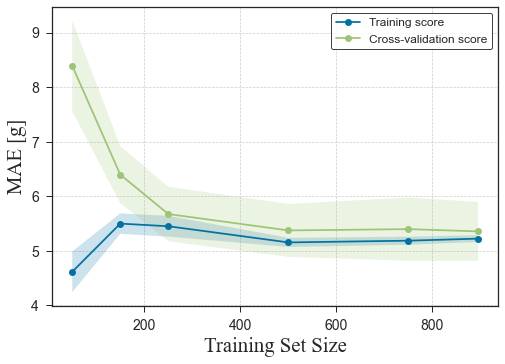

In [13]:
# train_mean=-np.mean(train_score,axis=1)
# train_std=-np.std(train_score,axis=1)
# test_mean=-np.mean(test_score,axis=1)
# test_std=-np.std(test_score,axis=1)
    
# plt.figure()
# plt.subplots(1)
# plt.plot(train_size,train_mean, 'o-', color="b",label="Training score")
# plt.plot(train_size, test_mean, 'o-', color="g",label="Cross-validation score")
# plt.fill_between(train_size, train_mean - train_std, train_mean + train_std, alpha=0.2)
# plt.fill_between(train_size, test_mean - test_std, test_mean + test_std, alpha=0.2)
# plt.title("Learning Curve for {}".format(str(mod).split('(')[0]))
# plt.xlabel("Training Set Size")
# plt.ylabel("RMS Error")
# plt.legend(loc="best")
# plt.show()
train_mean=-np.mean(train_score,axis=1)
train_std=-np.std(train_score,axis=1)
test_mean=-np.mean(test_score,axis=1)
test_std=-np.std(test_score,axis=1)
    
plt.figure()
plt.style.use('seaborn-ticks')
csfont = {'fontname':'Times New Roman'}
plt.subplots(1)
plt.plot(train_size,train_mean, 'o-', color="b",label="Training score")
plt.plot(train_size, test_mean, 'o-', color="g",label="Cross-validation score")
plt.fill_between(train_size, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.fill_between(train_size, test_mean - test_std, test_mean + test_std, alpha=0.2)
# plt.title("Learning Curve for {}".format(str(mod).split('(')[0]))
plt.xlabel("Training Set Size", fontsize='xx-large',**csfont)
plt.ylabel("MAE [g]", fontsize='xx-large',**csfont)
leg = plt.legend(frameon=True,loc='best',prop={'size': 12})
leg.get_frame().set_linewidth(1)
leg.get_frame().set_edgecolor('k')
plt.grid(linestyle = '--', linewidth = 0.7)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
# plt.savefig('pellassLC', bbox_inches="tight")
plt.show()

In [14]:
pd.DataFrame(test_mean)

,0
0,8.390779
1,6.396335
2,5.673902
3,5.373541
4,5.397274
5,5.356204


## Unknown data test

In [18]:
X = X.to_numpy()
y = y.to_numpy()
y_Test=y_Test.to_numpy()
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    HBM_Train = mod.fit(X_train, y_train)
    HBM_Test = HBM_Train.predict(X_test)
    print('Root Mean squared error: %f'
          % mean_squared_error(y_test, HBM_Test,squared=False))
    print()

ytestunk=HBM_Train.predict(X_Test)
err=np.zeros(len(ytestunk))
for u in range (0,len(ytestunk)):
    err[u]=np.sqrt((y_Test[u]-ytestunk[u])**2)
a=pd.DataFrame(err).describe()
cov_r=a.loc['std']/abs(a.loc['mean'])
print("error COV--->{}  error mean --->{}  error std --->{}".format(cov_r,abs(a.loc['mean']),a.loc['std']))

Root Mean squared error: 6.797672

Root Mean squared error: 6.535412

Root Mean squared error: 7.953292

Root Mean squared error: 7.589351

Root Mean squared error: 8.878703

Root Mean squared error: 6.070505

Root Mean squared error: 10.624569

Root Mean squared error: 7.485590

Root Mean squared error: 7.971544

Root Mean squared error: 7.055279

error COV--->0    1.053877
dtype: float64  error mean --->0    5.3274
Name: mean, dtype: float64  error std --->0    5.614425
Name: std, dtype: float64


C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (716). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (716). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (716). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (716). n_quantiles is set to n_samples.
  warning

# train score

In [19]:
ytr=HBM_Train.predict(X)
err=np.zeros(len(ytr))
for u in range (0,len(ytr)):
    err[u]=np.sqrt((y[u]-ytr[u])**2)
a=pd.DataFrame(err).describe()
cov_r=a.loc['std']/abs(a.loc['mean'])
print("error COV--->{}  error mean --->{}  error std --->{}".format(cov_r,abs(a.loc['mean']),a.loc['std']))

error COV--->0    1.040568
dtype: float64  error mean --->0    5.243866
Name: mean, dtype: float64  error std --->0    5.456597
Name: std, dtype: float64


In [20]:
err=np.zeros(len(ytr))
for u in range (0,len(ytr)):
    err[u]=y[u]-ytr[u]
pd.DataFrame(err).describe()

,0
count,796.000000
mean,0.520994
std,7.552178
min,-34.749161
25%,-4.056867
50%,-0.341731
75%,4.281398
max,72.087090


In [21]:
err=np.zeros(len(ytestunk))
for u in range (0,len(ytestunk)):
    err[u]=y_Test[u]-ytestunk[u]
pd.DataFrame(err).describe()

,0
count,199.000000
mean,0.330899
std,7.741851
min,-29.864561
25%,-4.762932
50%,-0.158784
75%,3.223972
max,41.120071


In [13]:
df_tosave=pd.DataFrame(ytestunk,columns = ['Unseen predicted'])
df_tosave['test actual']=pd.DataFrame(y_Test)
df_tosave.to_csv('launseen.csv')

df_trn=pd.DataFrame(ytr,columns = ['train predicted'])
df_trn['actual']=pd.DataFrame(y)
df_trn.to_csv('latrain.csv')

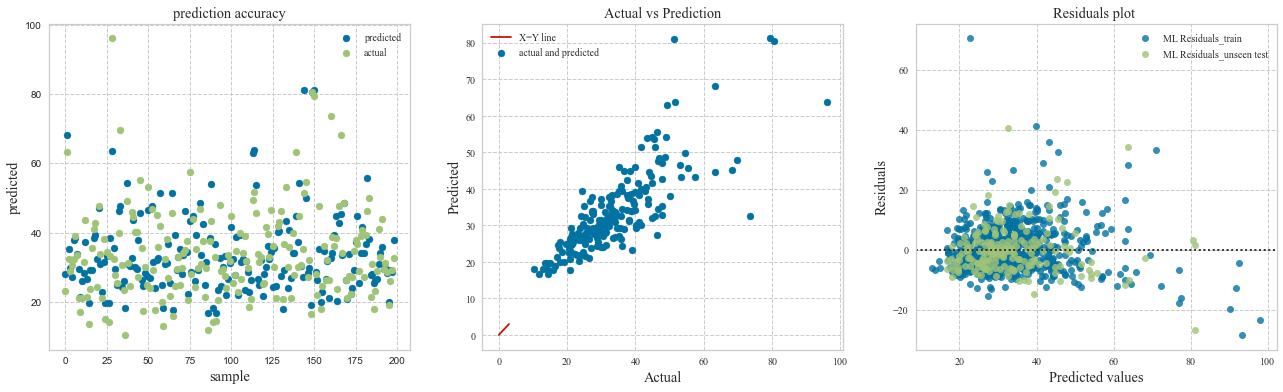

In [14]:
plt.figure(figsize=(22, 6))
csfont = {'fontname':'Times New Roman'}
plt.subplot(1,3,1)
plt.scatter(np.arange(0,len(ytestunk)),ytestunk,label='predicted')
plt.scatter(np.arange(0,len(y_Test)),y_Test,label='actual')
plt.grid( linestyle='--')
plt.title('prediction accuracy', fontsize='large',**csfont)
plt.xlabel('sample', fontsize='large',**csfont)
plt.ylabel('predicted', fontsize='large',**csfont)
plt.rcParams["font.family"] = "Times New Roman"
plt.legend()

plt.subplot(1,3,2)
plt.scatter(y_Test,ytestunk,label='actual and predicted')
plt.plot([0,3],[0,3],color='r',label='X=Y line')
plt.grid( linestyle='--')
plt.title('Actual vs Prediction', fontsize='large',**csfont)
plt.xlabel('Actual', fontsize='large',**csfont)
plt.ylabel('Predicted', fontsize='large',**csfont)
plt.rcParams["font.family"] = "Times New Roman"
plt.legend()

plt.subplot(1,3,3)
a=sns.residplot(y=abs(y), x=abs(ytr),label='ML Residuals_train')
r=sns.residplot(y=abs(y_Test), x=abs(ytestunk),label='ML Residuals_unseen test')
plt.grid( linestyle='--')
plt.title('Residuals plot ', fontsize='large',**csfont)
plt.xlabel('Predicted values', fontsize='large',**csfont)
plt.ylabel('Residuals', fontsize='large',**csfont)
plt.rcParams["font.family"] = "Times New Roman"
plt.legend()

plt.show()